# Dokumentationsdatei für KI mit Python
___
# Inhaltsverzeichnis
- [Generelle Abfrage](#generell-abfragen)
- [Variablen](#variablen)
- [Datentypen](#datentypen)
  - [Strings](#strings)
  - [Boolean](#boolean)
- [Schleifen und Beningungen](#schleifen-und-bedingungen)
  - [Schleifen](#schleifen)
- [datenstrukturen](#datenstrukturen)
  - [Listen](#listen) 
  - [Sets](#sets) 
  - [Tupel](#tupel)
  - [Dictionaries](#dictionaries)
- [Operationen](#operationen)
- [Mathe](#mathe)
- [Logische Operatoren](#logische-operatoren)
- [Input/Output](#input--output)
  - [Mögliche Input Typen](#mögliche-input-typen) 
- [Funktionen](#funktionen)
- [Librarys](#librarys)
  - [NumPy](#numpy)
    - [Arrays](#numpy-arrays)
    - [Random](#numpy-random)
    - [Broadcasting](#numpy-broadcasting)
    - [2D Indexing](#numpy-indexing-a-2d-array-matrices) 
    - [Bedinkte Selektion](#numpy-conditional-selection)
    - [Arithmetik](#numpy-arithmetic)
    - [Axial Logik](#numpy-axis-logic)
  - [Pandas](#pandas)
    - [Series](#series)
      - [Index und Data Lists](#index-and-data-lists)
      - [Kernidee von Serien](#kernidee-von-series)
      - [Operationen](#series-operationen)
    - [DataFrames](#dataframes)
      - [Erzugung](#dataframes-erzeugen)
      - [Basic Data Informationen](#basic-data-informationen-mit-dataframe)
      - [Selection, Indexing und anpassungen der Daten](#selection-indexing-und-anpassungen-der-daten-mit-dataframes)
      - [Tabellen verbinden/zusammenlegen](#concationation--tabellen-zusammenlegen)
        - Enthält Joins usw. 
    - [Bedinktes Filtern](#bedinktes-filtern)
    - [Pandas Methoden](#pandas-methoden)
    - [Umgang mit Null und uninterpretierbaren Werten](#missing-data-in-pandas)
      - Enthält auch Drop Data und Fill Data
    - [Group By und Multi Level Index](#groupby-operations-and-multi-level-index)
    - [xs indexing (hirachisches Indexen)](#xs)
    - [Aggregat Methode agg](#aggregat-methode-agg)
      - min max usw auf eine ganze Tabelle anwenden
    - [Umgang mit Text](#pandas-umgang-mit-text) 
    - [Umgang mit Zeiten](#umgang-mit-zeiten)

# Generelle Infos
- Es ist eine High Level general purpose programming language asd
- Ist Objektorientiert 
- Es wird nur noch Python 3.6.X oder großer verwendet 
- Python 2 ist quasi nicht mehr existent 
- Funktioniert wie Java auf allen OS 
- Password für Jupiter Nodebooks 1234asdf
- ; wird nicht benötigt
- 1 TAB = 4 leerzeichen

## Jupyterlab Markdown
- Link [Hier](#software-infos) muss alles klein geschrieben und mit - verbunden werden
- Link [internet](https://www.google.com) 

## Software Infos
**Password für Jupiter** Nodebooks 1234asdf



# Generell Abfragen

In [78]:
#Python Version check
from platform import python_version
print("Version " + python_version())

# Alle Libs
import numpy as np 
import pandas as pd 
from pathlib import Path

#Environment check
import os
print ("ENV " + os.environ['CONDA_DEFAULT_ENV'])

# JupyterBook Path
print(Path.cwd())

# Create folder for test.CSV
pfad = Path('./temp')
if os.path.exists(pfad):
    print("./temp exists")
else: 
    pfad.mkdir(parents=True, exist_ok=True)

Version 3.11.5
ENV PythonTutorialKurs
c:\Users\marce\OneDrive\IT_Projekte\JupyterLabProjekte
./temp exists


# Nützliche Methoden

In [25]:
def print_unique_values(dataframe):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        print(f"unique values for: '{column}': {unique_values}\n")

def change_value_komma2Dot(dataframe, SpaltenName):
        dataframe[SpaltenName] = dataframe[SpaltenName].str.replace(',', '.')

def print_all_data(dataframe):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    print(dataframe)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')

def are_colums_identical(dataframe):
    from warnings import simplefilter
    simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
    
    df_bool = pd.DataFrame()

    for column in dataframe.columns:
        for columnTest in dataframe.columns:
            df_bool[f'{column} |UND| {columnTest}'] = dataframe[column] == dataframe[columnTest]           
    
    for column in df_bool.columns:
        if (df_bool[column].unique() == True).all():
            print(f"{column} {df_bool[column].unique()}")

def dataframe_null_value_check(dataframe):
    for col in dataframe.columns:
        if dataframe[col].isnull().any():
            print(f"Colum '{col}' contains null values")
        
def dataframe_empty_value_check(dataframe):
    for col in dataframe.columns:
        if (dataframe[col] == '').any():
            print(f"Colum '{col}' contains null values")

# Variablen

In [26]:
# Can not start with number or special characters
name_of_var = 2

# Ansonsten wie bei anderen Sprachen
x = 2
y = 3
z = x + y
z 

5

# Datentypen

## Strings

Ausgabeformen

In [27]:
x = 'hello'
x

'hello'

In [28]:
print(x)

hello


Übergabeparamter

In [29]:
print('My number is: {one}, and my name is: {two}'.format(one=1,two="Marcel"))

My number is: 1, and my name is: Marcel


In [30]:
num = 1
name = "Marcel"
print('My number is: {}, and my name is: {}'.format(num,name))

My number is: 1, and my name is: Marcel


### String Manipulieren

In [31]:
stringBeispiel = "Ich bin ein String \nUnd das war ein Zeilenumbruch"
print("1: " + stringBeispiel[0])  # = nichts da 0 vor dem ersten element liegt   0 und -0 sind gleich   
print("2: " + stringBeispiel[-1]) # =  das letzte 'h'
print("3: " + stringBeispiel[0:2]) # = 'Ic'  3 ist hinter dem dritten buchstaben daher wird es nicht ausgegeben 
print("4: " + stringBeispiel[-2:]) # = 'ch'  
print("5: " + stringBeispiel[:])  # = ganzer text
print("6: " + stringBeispiel[2:400]) #gibt alles ab dem ersten 'h' aus (also der dritte buchstabe) trotz index out of range


1: I
2: h
3: Ic
4: ch
5: Ich bin ein String 
Und das war ein Zeilenumbruch
6: h bin ein String 
Und das war ein Zeilenumbruch


In [32]:
#Überschreiben einzelner Chars
#stringBeispiel[0] = "c"  geht nicht 
stringBeispiel = "c" + stringBeispiel[1:] # gibt den alten string aus nur mit einem c statt einem I am Anfang 
print("1: " + stringBeispiel)

#Ganz verändern
stringBeispiel = "Hallo"
print("2: " + stringBeispiel)

# concat
stringBeispiel = stringBeispiel + " Ballo"
print("2: " + stringBeispiel)


1: cch bin ein String 
Und das war ein Zeilenumbruch
2: Hallo
2: Hallo Ballo


### String Methoden

In [33]:
st = 'hello my name is Sam'
#st.lower()
#st.upper()
st.split()

['hello', 'my', 'name', 'is', 'Sam']

In [34]:
tweet = 'Go Sports! #Sports my Frind #Fisch'
tweet.split('#') # ['Go Sports! ', 'Sports']
#tweet.split('#')[1] # Das erste `#` bis zum zweiten `#` also 'Sports my Frind '

['Go Sports! ', 'Sports my Frind ', 'Fisch']

## Boolean

In [35]:
bt = True
bf = False

# Schleifen und Bedingungen

## If

In [36]:
x= 3
#if statment (1 TAB = 4 leerzeichen)
a= True
b= True
if x < 0:
    print("Negative value")
elif x == 0:
    print("Zero")
elif x == 1:
    print("Single")
elif a and b:
    print("A and B are true")
elif a or b:
    print("A or B or both are true")
elif not a and not b:
    print("A and B are false")
else:
    print("More")

A and B are true


## SCHLEIFEN


Funktionieren etwas anders als in Java oder C

```
Syntax
for Variable in Sequenz:
	Anweisung1
	Anweisung2
	...
	Anweisungn
else:
	Else-Anweisung1
	Else-Anweisung2
	...
	Else-Anweisungm
```
### Die Range Funktion
Mit Hilfe der range()-Funktion lässt sich die for-Schleife ideal für Iterationen nutzen. range() liefert Listen, die arithmetischen Aufzählungen entsprechen.
Beispiel: 
```
range(10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
```
Obiges Beispiel zeigt, dass Range mit einem Argument aufgerufen die Liste der Zahlen von 0 bis zu diesem Argument liefert.
range() kann aber auch mit zwei Argumenten aufgerufen werden: 
```
range(begin,end)
range(4,10)
[4, 5, 6, 7, 8, 9]
```
Dann wird eine Liste aller ganzen Zahlen von begin (einschließlich) bis end (aussschließlich) geliefert.
Als drittes Argument kann man range() noch die Schrittweite mitgeben.
Beispiel: 
```
range(begin,end,schrittweite)
range(4,50,5)
[4, 9, 14, 19, 24, 29, 34, 39, 44, 49]
```


### While Schleife

In [37]:
#While
i = 1
while i < 4:
     print(i)
     i  += 1

1
2
3


### For Schleife

In [38]:
languages = ["C", "C++", "Perl", "Python"] 
for x in languages:
    print(x)

C
C++
Perl
Python


In [39]:
for i in range(3, 6): 
    print(i)

3
4
5


In [40]:
for i in range(10): # The pass statement does nothing
    pass

In [41]:
# Objekt und ID auswählen

words = ["cat", "dog", "goat"]
for w in words:
    print(w, "(", len(w), "characters )")               # Option 1
    #print("{} ( {} characters )".format(w, len(w)))    # Option 2
    #print(f"{w} ( {len(w)} characters )")              # Option 3

cat ( 3 characters )
dog ( 3 characters )
goat ( 4 characters )


In [42]:
tel = {"john": 4711, "jane": 4712, "alice": 4321}
for name in tel:
    print("The phone number of {} is {}".format(name, tel[name]))

The phone number of john is 4711
The phone number of jane is 4712
The phone number of alice is 4321


In [43]:
# Iterate over dictionaries
for name, value in tel.items():
    print("The phone number of {} is {}".format(name, value))

The phone number of john is 4711
The phone number of jane is 4712
The phone number of alice is 4321


In [44]:
#Schleife mit else Clausel
x = int(input("Please enter an integer: "))
for i in range(10): 
    if i == x:
        print("Your value is in [0, 9]")
        break
else:
    print("Your value is NOT in [0, 9]")

Your value is in [0, 9]


# Datenstrukturen

## Listen
Indizierung funktioniert wie bei Strings

In [45]:
# Grundlegen
[1,2,3]

[1, 2, 3]

In [46]:
# Verschachtelt
['hi',1,[1,2]]

['hi', 1, [1, 2]]

In [47]:
lst = [1,2,3]
# lst.pop() # liefert 3

# ist 1 in der liste?
1 in lst

True

In [48]:
x = [1,2,3,4]
[item**2 for item in x]

[1, 4, 9, 16]

Manipulation

In [49]:
my_list = ['a','b','c']
#my_list[0] # 'a'
#my_list[1:] # ['b', 'c']
my_list[0] = 'NEW'
my_list

['NEW', 'b', 'c']

In [50]:
# Beispiel 1
squares = [1, 4, 9, 16, 25]
squares[3] = 12 # Ausgabe 1,4,9,12,25
squares.append(30) # fügt der liste am ende das Element 30 zu
squares

[1, 4, 9, 12, 25, 30]

In [51]:
# Beispiel 2
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
letters[2:5] = [] # Removing items
letters # ['a', 'b', 'f', 'g'] die 0 ist vor dem a und die a ist somit die 1
letters[:] = [] # Clear the list 

Verschachtelte

In [52]:
nest = [1,2,3,[4,5,['target']]]
nest[3]         # [4, 5, ['target']]
nest[3][2]      # ['target']
nest[3][2][0]   # 'target'

'target'

In [53]:
# das "hello" auslesen
lst = [1,2,[3,4],[5,[100,200,['hello']],23,11],1,7]
lst[3][1][2][0]

'hello'

## Sets
A set is an unordered collection with no duplicate elements.

In [54]:
{1,2,3}

{1, 2, 3}

In [55]:
{1,2,3,1,2,1,2,3,3,3,3,2,2,2,1,1,2}

{1, 2, 3}

In [56]:
basket = {"apple", "orange", "apple", "pear", "orange", "banana"}
print(basket) # {'banana', 'apple', 'orange', 'pear'}
"orange" in basket #True
"pumpkin" in basket #False

{'banana', 'orange', 'pear', 'apple'}


False

In [57]:
a = set("abracadabra") # {'a', 'b', 'c', 'd', 'r'}
b = set("alacazam")    # {'a', 'c', 'l', 'm', 'z'}
a - b # {'b', 'd', 'r'} letters in a but not in b
a | b # {'a', 'b', 'c', 'd', 'l', 'm', 'r', 'z'} letters in a or b
a & b # {'a', 'c'} letters in a and b
a ^ b # {'b', 'd', 'l', 'm', 'r', 'z'} letters in a or b, but not in both

{'b', 'd', 'l', 'm', 'r', 'z'}

## Tupel
Sind kommaseperierte Werte

In [58]:
#Kommaseperierte Werte 
#Tuperlwerte sind unveränderlich 
t = 4711, 1147, "Hello!"
t[0] # ausgabe 4711
t # Ausgabe (4711, 1147, 'Hello!')


(4711, 1147, 'Hello!')

In [59]:
u = t, ('a', 'b', 'c') # Nested tuples
u # ausgabe ((4711, 1147, 'Hello!'), ('a', 'b', 'c'))

((4711, 1147, 'Hello!'), ('a', 'b', 'c'))

In [60]:
lst = [1, 2, 3] # kein Tupel
v = (lst, [3, 2, 1]) # they can contain mutable objects
v # ([1, 2, 3], [3, 2, 1])
lst[1] = 4 # Changing the list (first element in tuple)
v # ([1, 4, 3], [3, 2, 1])
x, y = v # Unpacking the tuple elements
x # [1, 4, 3]
y # [3, 2, 1]

[3, 2, 1]

## Dictionaries
Eins satz von Schlüssel:Wert paaren welche in dem jeweiligen dictionary unique sein müssen


In [61]:
d = {'key1':'item1','key2':'item2'}
d

{'key1': 'item1', 'key2': 'item2'}

In [62]:
d['key1']

'item1'

In [63]:
d.keys() # dict_keys(['key1', 'key2'])
d.items() # dict_items([('key1', 'item1'), ('key2', 'item2')])

dict_items([('key1', 'item1'), ('key2', 'item2')])

Beispiel

In [64]:
tel = {"john": 4711, "jane": 4712}

#alice hinzufügen
tel["alice"] = 4321 
print(tel) # {'john': 4711, 'jane': 4712, 'alice': 4321}

# Jane ausgeben
tel["jane"]# ausgabe 4712

# john löschen 
del tel["john"] 

list(tel) # ['jane', 'alice'] returns a list of keys
"jane" in tel #True
"alice" not in tel #False

{'john': 4711, 'jane': 4712, 'alice': 4321}


False

In [65]:
# Auslesen des "hello"
d = {'k1':[1,2,3,{'tricky':['oh','man','inception',{'target':[1,2,3,'hello']}]}]}
d['k1'][3]['tricky'][3]['target'][3]

'hello'

# Operationen

In [66]:
squares = [i*i for i in (1, 2, 3, 4, 5)] # On lists
print(squares) # [1, 4, 9, 16, 25]

[1, 4, 9, 16, 25]


In [67]:
powers = {x: 2**x for x in range(1, 6)} # On dictionaries
print(powers) # {1: 2, 2: 4, 3: 8, 4: 16, 5: 32}

{1: 2, 2: 4, 3: 8, 4: 16, 5: 32}


# Mathe

In [68]:
#Sonder Formen
2**10 # 2 to the power of 10 = 1024

1024

# Logische Operatoren 

In [69]:
(1 > 2) and (2 < 3)

False

In [70]:
(1 > 2) or (2 < 3)

True

In [71]:
(1 == 2) or (2 == 3) or (4 == 4)

True

# Input / Output


## Input

In [72]:
#input aus konsole einlese
x = int(input("Please enter an integer: ")) 
x

1

In [73]:
pwd

'c:\\Users\\marce\\OneDrive\\IT_Projekte\\JupyterLabProjekte'

In [74]:
# Dataframe einlesen
df = pd.read_csv("./ML_Python_Curse_Materialien/03-Pandas/tips.csv")
# df = pd.read_csv("c:\\Users\\marce\\OneDrive\\IT_Projekte\\JupyterLabProjekte\\ML_Python_Curse_Materialien\\03-Pandas\\tips.csv")
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458


### Mögliche Input Typen

<table border="1" class="colwidths-given docutils">
<colgroup>
<col width="12%" />
<col width="40%" />
<col width="24%" />
<col width="24%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Format Type</th>
<th class="head">Data Description</th>
<th class="head">Reader</th>
<th class="head">Writer</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>text</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Comma-separated_values">CSV</a></td>
<td><a class="reference internal" href="#io-read-csv-table"><span class="std std-ref">read_csv</span></a></td>
<td><a class="reference internal" href="#io-store-in-csv"><span class="std std-ref">to_csv</span></a></td>
</tr>
<tr class="row-odd"><td>text</td>
<td><a class="reference external" href="https://www.json.org/">JSON</a></td>
<td><a class="reference internal" href="#io-json-reader"><span class="std std-ref">read_json</span></a></td>
<td><a class="reference internal" href="#io-json-writer"><span class="std std-ref">to_json</span></a></td>
</tr>
<tr class="row-even"><td>text</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/HTML">HTML</a></td>
<td><a class="reference internal" href="#io-read-html"><span class="std std-ref">read_html</span></a></td>
<td><a class="reference internal" href="#io-html"><span class="std std-ref">to_html</span></a></td>
</tr>
<tr class="row-odd"><td>text</td>
<td>Local clipboard</td>
<td><a class="reference internal" href="#io-clipboard"><span class="std std-ref">read_clipboard</span></a></td>
<td><a class="reference internal" href="#io-clipboard"><span class="std std-ref">to_clipboard</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Microsoft_Excel">MS Excel</a></td>
<td><a class="reference internal" href="#io-excel-reader"><span class="std std-ref">read_excel</span></a></td>
<td><a class="reference internal" href="#io-excel-writer"><span class="std std-ref">to_excel</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="http://www.opendocumentformat.org">OpenDocument</a></td>
<td><a class="reference internal" href="#io-ods"><span class="std std-ref">read_excel</span></a></td>
<td>&#160;</td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://support.hdfgroup.org/HDF5/whatishdf5.html">HDF5 Format</a></td>
<td><a class="reference internal" href="#io-hdf5"><span class="std std-ref">read_hdf</span></a></td>
<td><a class="reference internal" href="#io-hdf5"><span class="std std-ref">to_hdf</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://github.com/wesm/feather">Feather Format</a></td>
<td><a class="reference internal" href="#io-feather"><span class="std std-ref">read_feather</span></a></td>
<td><a class="reference internal" href="#io-feather"><span class="std std-ref">to_feather</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://parquet.apache.org/">Parquet Format</a></td>
<td><a class="reference internal" href="#io-parquet"><span class="std std-ref">read_parquet</span></a></td>
<td><a class="reference internal" href="#io-parquet"><span class="std std-ref">to_parquet</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://msgpack.org/index.html">Msgpack</a></td>
<td><a class="reference internal" href="#io-msgpack"><span class="std std-ref">read_msgpack</span></a></td>
<td><a class="reference internal" href="#io-msgpack"><span class="std std-ref">to_msgpack</span></a></td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/Stata">Stata</a></td>
<td><a class="reference internal" href="#io-stata-reader"><span class="std std-ref">read_stata</span></a></td>
<td><a class="reference internal" href="#io-stata-writer"><span class="std std-ref">to_stata</span></a></td>
</tr>
<tr class="row-odd"><td>binary</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/SAS_(software)">SAS</a></td>
<td><a class="reference internal" href="#io-sas-reader"><span class="std std-ref">read_sas</span></a></td>
<td>&#160;</td>
</tr>
<tr class="row-even"><td>binary</td>
<td><a class="reference external" href="https://docs.python.org/3/library/pickle.html">Python Pickle Format</a></td>
<td><a class="reference internal" href="#io-pickle"><span class="std std-ref">read_pickle</span></a></td>
<td><a class="reference internal" href="#io-pickle"><span class="std std-ref">to_pickle</span></a></td>
</tr>
<tr class="row-odd"><td>SQL</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/SQL">SQL</a></td>
<td><a class="reference internal" href="#io-sql"><span class="std std-ref">read_sql</span></a></td>
<td><a class="reference internal" href="#io-sql"><span class="std std-ref">to_sql</span></a></td>
</tr>
<tr class="row-even"><td>SQL</td>
<td><a class="reference external" href="https://en.wikipedia.org/wiki/BigQuery">Google Big Query</a></td>
<td><a class="reference internal" href="#io-bigquery"><span class="std std-ref">read_gbq</span></a></td>
<td><a class="reference internal" href="#io-bigquery"><span class="std std-ref">to_gbq</span></a></td>
</tr>
</tbody>
</table>


## Output 


In [75]:
df = pd.read_csv("./ML_Python_Curse_Materialien/03-Pandas/tips.csv")

df.to_csv('./ML_Python_Curse_Materialien/03-Pandas/outputFile.csv',index=False)
# Set index=False if you do not want to save the index

In [76]:
# Read in with a SQL Query

# pip install sqlalchemy
from sqlalchemy import create_engine
temp_db = create_engine('sqlite:///:memory:')
pd.read_sql_query(sql="SELECT Country FROM populations",con=temp_db)

ModuleNotFoundError: No module named 'sqlalchemy'

# Funktionen

In [ ]:
def my_func(param1='default'):
    """
    Docstring goes here.
    """
    print(param1)

In [ ]:
my_func

<function __main__.my_func(param1='default')>

In [ ]:
my_func()

default


In [ ]:
my_func('new param')
# my_func(param1='new param')

new param


In [ ]:
def square(x):
    return x**2

out = square(2)
print(out)

4


# Librarys

## NumPy
NumPy is a powerful linear algebra library for Python. What makes it so important is that almost all of the libraries in the <a href='https://pydata.org/'>PyData</a> ecosystem (pandas, scipy, scikit-learn, etc.) rely on NumPy as one of their main building blocks. Plus we will use it to generate data for our analysis examples later on!


In [ ]:
# die gängigste Benennung
import numpy as np

### NumPy Arrays

NumPy arrays essentially come in two flavors: **vectors** and **matrices**. Vectors are strictly 1-dimensional (1D) arrays and matrices are 2D (but you should note a matrix can still have only one row or one column).

There are lot's of reasons to use a Numpy array instead of a "standard" python list object. Our main reasons are:
* Memory Efficiency of Numpy Array vs list
* Easily expands to N-dimensional objects
* Speed of calculations of numpy array
* Broadcasting operations and functions with numpy
* All the data science and machine learning libraries we use are built with Numpy

In [ ]:
# Durch eine Python List
my_list = [1,2,3]
my_list # [1, 2, 3]

np.array(my_list) # array([1, 2, 3])

my_matrix = [[1,2,3],[4,5,6],[7,8,9]]
my_matrix # [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

np.array(my_matrix)
#array([[1, 2, 3],
#      [4, 5, 6],
#      [7, 8, 9]])


In [ ]:
# Built-in Methode zum Array erzeugen
np.arange(0,10) # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
np.arange(0,11,2)# array([ 0,  2,  4,  6,  8, 10])

np.zeros(3) # array([0., 0., 0.])
np.ones(3) # array([1., 1., 1.])
np.ones((3,3))
#array([[1., 1., 1.],
#      [1., 1., 1.],
#      [1., 1., 1.]])

In [ ]:
# Array von 0-8 erzeugen und in 3x3 Matrix umwandeln
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
# Werteliste von 0 bis 24 erstellen
arr = np.arange(25)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
# linspace(start,end,anzahl_an_elementen)
# Return evenly spaced numbers over a specified interval. 

np.linspace(0,10,3) # array([ 0.,  5., 10.])

np.linspace(0,5,20)
#array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
#      1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
#      2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
#      3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [ ]:
# eye
# Creates an identity matrix

np.eye(4)
# array([[1., 0., 0.],
#      [0., 1., 0.],
#      [0., 0., 1.]])

In [ ]:
# Shape = size = Dimensionen eines Arrays
arr.shape # 25 Werte also 25

(25,)

In [ ]:
# dtype
# Datentyp herausfinden
arr.dtype

dtype('int32')

Array Indexing and Selection

In [ ]:
array = np.arange(0,11)
array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
array[2] # Wert an stelle 2
array[1:5] # array([1, 2, 3, 4])

array([1, 2, 3, 4])

NumPy comes with many [universal array functions](http://docs.scipy.org/doc/numpy/reference/ufuncs.html), or <em>ufuncs</em>, which are essentially just mathematical operations that can be applied across the array.<br>Let's show some common ones:

In [ ]:
# Taking Square Roots
np.sqrt(arr)

# Calculating exponential (e^)
np.exp(arr)

# Trigonometric Functions like sine
np.sin(arr)

# Taking the Natural Logarithm
np.log(arr)

# Auch
arr.sum()
arr.mean()
arr.max()
arr.min()
arr.var() # varianz
arr.std() # Standardabwichung

### NumPy Random


In [ ]:
# rand
# Creates an array of the given shape and populates it with random samples
# from a uniform distribution over [0, 1)

np.random.rand(2) # array([0.37065108, 0.89813878])
np.random.rand(5,5)
# array([[0.59495703, 0.64341193, 0.7559221 ],
#      [0.85989118, 0.94468606, 0.77475085],
#      [0.5711321 , 0.74215639, 0.96242756]]) 

In [ ]:
# randn
# Returns a sample (or samples) from the "standard normal" distribution [σ = 1]. 
# Unlike rand which is uniform, values closer to zero are more likely to appear

np.random.randn(2) #array([-0.36633217, -1.40298731])
np.random.randn(3,3)
#array([[-1.4849046 ,  0.2587541 ,  1.54935388],
#      [-1.24666674,  1.08529244, -2.31818499],
#      [ 0.46056443, -0.9724162 ,  0.95851008]])

In [ ]:
# randint
# Returns random integers from `low` (inclusive) to `high` (exclusive).

np.random.randint(1,100) #61
np.random.randint(1,100,10) # array([39, 50, 72, 18, 27, 59, 15, 97, 11, 14])

In [ ]:
# seed
# Can be used to set the random state, so that the same "random" results 
# can be reproduced

np.random.seed(42)
np.random.rand(4)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [ ]:
# 10 Integerwerte zwischen 0 und 50
ranarr = np.random.randint(0,50,10)
ranarr

array([25, 24, 15, 18, 14, 12, 26,  5,  5, 10])

In [ ]:
ranarr.max()
ranarr.min()

5

### NumPy Broadcasting


NumPy-Arrays unterscheiden sich von normalen Python-Listen durch ihre Fähigkeit zur **Broadcasting**. Bei Listen können Sie nur Teile einer Liste durch neue Teile derselben Größe und Form neu zuweisen. Das heißt, wenn Sie die ersten 5 Elemente einer Liste durch einen neuen Wert ersetzen wollten, müssten Sie eine neue 5-Elemente-Liste übergeben. Mit NumPy-Arrays können Sie einen einzelnen Wert über eine größere Menge von Werten übertragen:

In [ ]:
#Setting a value with index range (Broadcasting)
array[0:5]=100
array

array([100, 100, 100, 100, 100,   5,   6,   7,   8,   9,  10])

In [ ]:
# Ganzes Array mit 99 füllen
arr = np.arange(0,5)
arr[:]=99
arr

array([99, 99, 99, 99, 99])

In [ ]:
# SupArrays 
# behalten ihre Beziehung zum orginal bei
# Ist quasi wie eine View
arr = np.arange(0,11)
slice_of_arr = arr[0:4]
slice_of_arr[:]=99
arr

array([99, 99, 99, 99,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Array Copieren
arr_copy = arr.copy()

### NumPy Indexing a 2D array (matrices)


The general format is **arr_2d[row][col]** or **arr_2d[row,col]**. I recommend using the comma notation for clarity.

More Indexing Help
Indexing a 2D matrix can be a bit confusing at first, especially when you start to add in step size. Try google image searching *NumPy indexing* to find useful images, like this one:

<img src= './ML_Python_Curse_Materialien/02-Numpy/numpy_indexing.png' width=500/>

In [ ]:
arr_2d = np.array(([5,10,15],[20,25,30],[35,40,45]))
arr_2d

array([[ 5, 10, 15],
       [20, 25, 30],
       [35, 40, 45]])

In [ ]:
#Indexing row
arr_2d[1]

array([20, 25, 30])

In [ ]:
# Getting individual element value
arr_2d[1][0] # oder arr_2d[1,0]

20

In [ ]:
# 2D array slicing
#Shape (2,2) from top right corner
arr_2d[:2,1:]

array([[10, 15],
       [25, 30]])

Indexing Beispiel

In [ ]:
# Ausgang
mat = np.arange(1,26).reshape(5,5)
#array([[ 1,  2,  3,  4,  5],
#       [ 6,  7,  8,  9, 10],
#       [11, 12, 13, 14, 15],
#       [16, 17, 18, 19, 20],
#       [21, 22, 23, 24, 25]])

# Nur den unteren Rechten block
mat[2:5,1:]
#array([[12, 13, 14, 15],
#       [17, 18, 19, 20],
#       [22, 23, 24, 25]])

# Eine teilspalte
mat[:3,1:2] # das 1:2 sorgt dafür das die ausrichtung bleibt nur [:3,1] ergäbe [2,7,12]
#array([[ 2],
#       [ 7],
#       [12]])

### NumPy Conditional Selection
Wichtig für pandas

In [ ]:
arr = np.arange(1,11)
boolgroser4 = arr > 4 
boolgroser4

array([False, False, False, False,  True,  True,  True,  True,  True,
        True])

In [ ]:
# Gibt nur die Werte aus zu denen ein Pool exestiert
arr[boolgroser4] # arr[arr>4] liefert das selbe

array([ 5,  6,  7,  8,  9, 10])

### NumPy Arithmetic
You can easily perform *array with array* arithmetic, or *scalar with array* arithmetic. Let's see some examples:

In [ ]:
arr = np.arange(0,10)
arr + arr
arr * arr
arr - arr
arr**3 # alle Werte hoch^3

### NumPy Axis Logic


In array terms, axis 0 (zero) is the vertical axis (rows), and axis 1 is the horizonal axis (columns). These values (0,1) correspond to the order in which <tt>arr.shape</tt> values are returned.

<img src='./ML_Python_Curse_Materialien/02-Numpy/axis_logic.png' width=400/>

In [ ]:
arr_2d = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
arr_2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

By passing in <tt>axis=0</tt>, we're returning an array of sums along the vertical axis, essentially <tt>[(1+5+9), (2+6+10), (3+7+11), (4+8+12)]</tt>

In [ ]:
arr_2d.sum(axis=0)

array([15, 18, 21, 24])

## Pandas
ist eine library für die Datenanalyse welche mit DataFrame arbeitet (baiert auf Numpy).
Es ist ein Daten lese und schreib Tool und biete viele möglichkeiten über labels oder logik zu indizieren. Außerdem kann es die meisten Arten von Datenquellen erfassen und einlesen. 

### Series


Eine Serie ist einem NumPy-Array sehr ähnlich (tatsächlich baut sie auf dem NumPy-Array-Objekt auf). Der Unterschied zwischen einem NumPy-Array und einer Serie besteht darin, dass eine Serie Achsenbeschriftungen haben kann, d.h. sie kann durch eine Label indiziert werden, anstatt nur durch eine Zahl, allerdings wird im Hintergrund immer noch ein numerischer index verwendet. Es muss auch keine numerischen Daten enthalten, sondern kann jedes beliebige Python-Objekt enthalten.

Aufgabentechnisch befindet es sich zwischen der Datensäuberung und der Explorativen Datenanalyse.

In [ ]:
import numpy as np #daten erzeugen
import pandas as pd #daten maipulieren
# help(pd.Series) liefert die Dokumentation aber die online Doku ist besser zu lesen

#### Index and Data Lists

In [ ]:
# Ohne labels
myindex = ['USA','Canada','Mexico']
mydata = [1776,1867,1821]
myser = pd.Series(data=mydata)
myser

0    1776
1    1867
2    1821
dtype: int64

In [ ]:
# mit labels
myindex = ['USA','Canada','Mexico']
mydata = [1776,1867,1821]
myser = pd.Series(data=mydata,index=myindex)
myser

# geht auch 
# ran_data = np.random.randint(0,100,4)
# names = ['Andrew','Bobo','Claire','David']
# ages = pd.Series(ran_data,names)

USA       1776
Canada    1867
Mexico    1821
dtype: int64

In [ ]:
# aus einem Dictionary
ages = {'Sammy':5,'Frank':10,'Spike':7}
pages = pd.Series(ages)

In [ ]:
# Call values based on Named Index
pages['Frank']

# Integer Based Location 
#pages[1]

## Fehlerquellen
# - Falscher name
# - leerzeichen ['Frank ']
# - Groß und kleinschreibung ['frank']

10

#### Kernidee von Series

In [ ]:
# Imaginary Sales Data for 1st and 2nd Quarters for Global Company
q1 = {'Japan': 80, 'China': 450, 'India': 200, 'USA': 250}
q2 = {'Brazil': 100,'China': 500, 'India': 210,'USA': 260}

# Convert into Pandas Series
sales_Q1 = pd.Series(q1)
sales_Q2 = pd.Series(q2)



#### Series Operationen

In [ ]:
# Grab just the index keys
sales_Q1.keys()

Index(['Japan', 'China', 'India', 'USA'], dtype='object')

In [ ]:
# Can Perform Operations Broadcasted across entire Series
sales_Q1 * 2
# sales_Q2 / 100

Japan    160
China    900
India    400
USA      500
dtype: int64

Series Interaktion


In [ ]:
# Notice how Pandas informs you of mismatch with NaN
sales_Q1 + sales_Q2

Brazil      NaN
China     950.0
India     410.0
Japan       NaN
USA       510.0
dtype: float64

In [ ]:
# You can fill these with any value you want
sales_Q1.add(sales_Q2,fill_value=0) # 100+0 = 100

Brazil    100.0
China     950.0
India     410.0
Japan      80.0
USA       510.0
dtype: float64

### DataFrames
DataFrames sind ein extrem leistungsfähiges Werkzeug und eine natürliche Erweiterung der Pandas Series. Per Definition ist ein DataFrame:

**Ein Pandas DataFrame besteht aus mehreren Pandas-Serien, die sich Indexwerte teilen.**

#### DataFrames erzeugen

In [ ]:
# Make sure the seed is in the same cell as the random call
np.random.seed(101) # Setzt einen Seed für random in dieser Zelle
mydata = np.random.randint(0,101,(4,3))
mydata

array([[95, 11, 81],
       [70, 63, 87],
       [75,  9, 77],
       [40,  4, 63]])

In [ ]:
# Ohne Label
df = pd.DataFrame(data=mydata)
df

,0,1,2
0,95,11,81
1,70,63,87
2,75,9,77
3,40,4,63


In [ ]:
# mit Label
myindex = ['CA','NY','AZ','TX']
mycolumns = ['Jan','Feb','Mar']
df = pd.DataFrame(data=mydata,index=myindex,columns=mycolumns)
# df = pd.DataFrame(data=mydata,index=myindex)  Einzeln geht auch
df

,Jan,Feb,Mar
CA,95,11,81
NY,70,63,87
AZ,75,9,77
TX,40,4,63


In [ ]:
# Mit label
data = {'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3']}
one = pd.DataFrame(data)
one

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, CA to TX
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Jan     4 non-null      int32
 1   Feb     4 non-null      int32
 2   Mar     4 non-null      int32
dtypes: int32(3)
memory usage: 80.0+ bytes


Daten aus einer CSV-Datei lesen

In [ ]:
pwd

'c:\\Users\\marce\\OneDrive\\IT_Projekte\\JupyterLabProjekte'

In [ ]:
# path = 'ML_Python_Curse_Materialien/03-Pandas/example.csv' 
df = pd.read_csv("./ML_Python_Curse_Materialien/03-Pandas/tips.csv") # path
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17


#### Basic Data Informationen mit DataFrame

In [ ]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'price_per_person', 'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=244, step=1)

In [ ]:
# anfang
df.head(3)
# ende
df.tail(3)
# länge
len(df)
# infos über die Daten
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [ ]:
df.describe()
# df.describe().transpose() Transponiert

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### Selection, Indexing und anpassungen der Daten mit DataFrames

In [ ]:
# Einen wert
df['total_bill'][0]

16.99

In [ ]:
# nur eine Spalte 
df['total_bill']
# mehrere Spalten
df[['total_bill','tip']]

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [ ]:
# Neue Spalte hinzufügen
df['tip_percentage'] = 100* df['tip'] / df['total_bill']
df['price_per_person'] = df['total_bill'] / df['size']
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000,Christy Cunningham,3560325168603410,Sun2959,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667,Douglas Tucker,4478071379779230,Sun4608,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333,Travis Walters,6011812112971322,Sun4458,16.658734


In [ ]:
# Spalten anpassen

# Numpy kann verwendet werden
df['price_per_person'] = np.round(df['price_per_person'],2)
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,16.658734


In [ ]:
# Spalte löschen
df = df.drop("tip_percentage",axis=1)
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458


In [ ]:
# Index
df.index

RangeIndex(start=0, stop=244, step=1)

In [ ]:
# selber eine PK wählen z.B. ISBN
df = df.set_index('Payment ID')
df.head(3)

# wieder einen AutoInt nehmen
# df = df.reset_index()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number
Payment ID,,,,,,,,,,
Sun2959,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410
Sun4608,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230
Sun4458,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322


In [ ]:
# Zeilen auslesen
df.iloc[0] # int basiert
# df.iloc[0:4] 
df.loc['Sun2959'] # namensbasiert
# df.loc[['Sun2959','Sun5260']]

total_bill                       16.99
tip                               1.01
sex                             Female
smoker                              No
day                                Sun
time                            Dinner
size                                 2
price_per_person                  8.49
Payer Name          Christy Cunningham
CC Number             3560325168603410
Name: Sun2959, dtype: object

In [ ]:
# Zeilen Löschen
df.drop('Sun2959',axis=0).head(3) 

In [ ]:
# Zeile einfügen
fehlt 

NameError: name 'fehlt' is not defined

#### Concationation / Tabellen zusammenlegen

In [ ]:
data_one = {'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3']}
data_two = {'C': ['C0', 'C1', 'C2', 'C3'], 'D': ['D0', 'D1', 'D2', 'D3']}
one = pd.DataFrame(data_one)
two = pd.DataFrame(data_two)

axis0 = pd.concat([one,two],axis=0) # Tabellen zusammenführen
axis1 = pd.concat([one,two],axis=1) # Spalten zusammenführen

axis1 

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
axis0 # Tabellen zusammenführen

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,A3,B3,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1
2,NaN,NaN,C2,D2
3,NaN,NaN,C3,D3


pd.merge()

Merged panda Dataframes so ähnlich wie in SQL 

Inner,Left, Right, and Outer Joins

In [ ]:
registrations = pd.DataFrame({'reg_id':[1,2,3,4],'name':['Andrew','Bobo','Claire','David']})
logins = pd.DataFrame({'log_id':[1,2,3,4],'name':['Xavier','Andrew','Yolanda','Bobo']})

In [ ]:
registrations

,reg_id,name
0,1,Andrew
1,2,Bobo
2,3,Claire
3,4,David


In [ ]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [ ]:
# Inner Join = normaler Join (PK match)
pd.merge(registrations,logins,how='inner')
# Panda braucht nicht unbedingt einen PK wert wenn zwei Tabellen die slebe spalte haben
# pd.merge(registrations,logins,how='inner',on='name')

,reg_id,name,log_id
0,1,Andrew,2
1,2,Bobo,4


In [ ]:
# Left Join (alle Linken Spalten + die passenden rechts)
pd.merge(registrations,logins,how='left')

,reg_id,name,log_id
0,1,Andrew,2.0
1,2,Bobo,4.0
2,3,Claire,NaN
3,4,David,NaN


In [ ]:
# right join (alle rechten Spalten + die passenden links)
pd.merge(registrations,logins,how='right')

,reg_id,name,log_id
0,NaN,Xavier,1
1,1.0,Andrew,2
2,NaN,Yolanda,3
3,2.0,Bobo,4


In [ ]:
# outer Join (Alle Spalten von beiden seiten)
pd.merge(registrations,logins,how='outer')

,reg_id,name,log_id
0,1.0,Andrew,2.0
1,2.0,Bobo,4.0
2,3.0,Claire,NaN
3,4.0,David,NaN
4,NaN,Xavier,1.0
5,NaN,Yolanda,3.0


In [ ]:
# unterschiedliche PKs
registrations.columns = ['reg_id','reg_name'] # Spalten rename
registrations

,reg_id,reg_name
0,1,Andrew
1,2,Bobo
2,3,Claire
3,4,David


In [ ]:
pd.merge(registrations,logins,left_on='reg_name',right_on='name') # default ist inner join

,reg_id,reg_name,log_id,name
0,1,Andrew,2,Andrew
1,2,Bobo,4,Bobo


In [ ]:
pd.merge(registrations,logins,left_on='reg_name',right_on='name').drop('reg_name',axis=1)

,reg_id,log_id,name
0,1,2,Andrew
1,2,4,Bobo


In [ ]:
# Spalten rename
registrations.columns = ['id','name'] 
logins.columns = ['id','name'] 

pd.merge(registrations,logins,on='name')
# x = links
# y = rechts

,id_x,name,id_y
0,1,Andrew,2
1,2,Bobo,4


In [ ]:
pd.merge(registrations,logins,on='name',suffixes=('_reg','_log'))

,id_reg,name,id_log
0,1,Andrew,2
1,2,Bobo,4


### Bedinktes Filtern

In [ ]:
df = pd.read_csv("./ML_Python_Curse_Materialien/03-Pandas/tips.csv")
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458


In [ ]:
# einfach Bedingung
bool_series = df['total_bill'] > 30
df[bool_series].head(3)
# oder
# df[df['total_bill']>30]
# df[df['sex'] == 'Male']

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
11,35.26,5.00,Female,No,Sun,Dinner,4,8.82,Diane Macias,4577817359320969,Sun6686
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239
39,31.27,5.00,Male,No,Sat,Dinner,3,10.42,Mr. Brandon Berry,6011525851069856,Sat6373


In [ ]:
# Multiple Bedingungen 
df[(df['total_bill'] > 30) & (df['sex']=='Male')].head(3)

# Not wird hier mit einem ~ gekenzeichnet oder halt =!
# df[(df['total_bill'] > 30) & ~(df['sex']=='Male')]
# df[(df['total_bill'] > 30) & (df['sex']!='Male')]

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239
39,31.27,5.00,Male,No,Sat,Dinner,3,10.42,Mr. Brandon Berry,6011525851069856,Sat6373
44,30.40,5.60,Male,No,Sun,Dinner,4,7.60,Todd Cooper,503846761263,Sun2274


In [ ]:
# isin() Operator wird dazu verwendet eine liste von Filtern auszuführen
options = ['Sat','Sun']
df['day'].isin(options)

0       True
1       True
2       True
3       True
4       True
       ...  
239     True
240     True
241     True
242     True
243    False
Name: day, Length: 244, dtype: bool

In [ ]:
# Die ganze Tabelle gefiltert ausgeben
df[df['day'].isin(['Sat','Sun'])]

### Pandas Methoden


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("./ML_Python_Curse_Materialien/03-Pandas/tips.csv")
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458


#### apply()

In [ ]:
# Methode definieren
def last_four(num):
    return str(num)[-4:]

# Beispiel 
last_four(3560325168603410)

'3410'

In [ ]:
# Methode nutzen um eine neue Spalte zu erzeugen
df['last_four'] = df['CC Number'].apply(last_four) # Gillt für alle Werte der Spalte
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322


In [ ]:
# mit labda 

# def simple(num):
#    return num*2
# das selbe wie
lambda num: num*2
df['total_bill'].apply(lambda bill:bill*0.18)
df.head(3) 

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322


In [ ]:
# apply für mehrere Spalten
def quality(total_bill,tip):
    if tip/total_bill  > 0.25:
        return "Generous"
    else:
        return "Other"
    
df['Tip Quality'] = df[['total_bill','tip']].apply(lambda df: quality(df['total_bill'],df['tip']),axis=1)
# Viel schneller wäre
# df['Tip Quality'] = np.vectorize(quality)(df['total_bill'], df['tip'])
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Tip Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,Other


In [ ]:
# Geschwidingkeitsunterscheid zwischen lambda und np.vectorize
import timeit 
  
# code snippet to be executed only once 
setup = '''
import numpy as np
import pandas as pd
df = pd.read_csv('tips.csv')
def quality(total_bill,tip):
    if tip/total_bill  > 0.25:
        return "Generous"
    else:
        return "Other"
'''
  
# code snippet whose execution time is to be measured 
stmt_one = ''' 
df['Tip Quality'] = df[['total_bill','tip']].apply(lambda df: quality(df['total_bill'],df['tip']),axis=1)
'''

stmt_two = '''
df['Tip Quality'] = np.vectorize(quality)(df['total_bill'], df['tip'])
'''

In [ ]:
# lambda
timeit.timeit(setup = setup, 
                    stmt = stmt_one, 
                    number = 1000) 

In [ ]:
# np.vectorize
timeit.timeit(setup = setup, 
                    stmt = stmt_two, 
                    number = 1000) 

#### sort_values()

In [ ]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Tip Quality
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,3410,Other
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,9230,Other
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,1322,Other


In [ ]:
df.sort_values('total_bill').head(3)

# Für zwei 
# df.sort_values(['tip','size'])

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,last_four,Tip Quality
67,3.07,1.0,Female,Yes,Sat,Dinner,1,3.07,Tiffany Brock,4359488526995267,Sat3455,5267,Generous
92,5.75,1.0,Female,Yes,Fri,Dinner,2,2.88,Leah Ramirez,3508911676966392,Fri3780,6392,Other
111,7.25,1.0,Female,No,Sat,Dinner,1,7.25,Terri Jones,3559221007826887,Sat4801,6887,Other


#### df.corr() Korrelations check 

In [ ]:
# Korrelation für numerische Daten
df[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


#### idxmin / idxmax

In [ ]:
# Der Zielwert in der letzten spalte
df.sort_values('total_bill').tail(3)

,total_bill,tip,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
59,48.27,6.73,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
212,48.33,9.00,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590
170,50.81,10.00,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954


In [ ]:
df['total_bill'].max() # 50.81  auch .min()
df['total_bill'].idxmax() # 170 auch idmin()


#### value_counts

In [ ]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

#### replace

In [ ]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458


In [ ]:
df['time']=df['time'].replace(to_replace='Dinner',value='Din')
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Din,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Din,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Din,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Din,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Din,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Din,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Din,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Din,2,11.34,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,Male,No,Sat,Din,2,8.91,Dennis Dixon,4375220550950,Sat17


#### unique

In [ ]:
# welche Werte sind unique?
df['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [ ]:
# wie viele unique Werte gibt es 
df['size'].nunique()

#### map

In [ ]:
# Daten Mappen
my_map = {'Dinner':'D','Lunch':'L'}
df['time'].map(my_map)

0      D
1      D
2      D
3      D
4      D
      ..
239    D
240    D
241    D
242    D
243    D
Name: time, Length: 244, dtype: object

#### Duplicates / Dublikate / Doppelte Werte

In [ ]:
# Returns True for the 1st instance of a duplicated row
df.duplicated()
#df.duplicated().value_counts

False    244
Name: count, dtype: int64

In [ ]:
#Beispiel
simple_df = pd.DataFrame([1,2,2],['a','b','c'])
simple_df

,0
a,1
b,2
c,2


In [ ]:
simple_df.duplicated()

a    False
b    False
c     True
dtype: bool

In [ ]:
simple_df.drop_duplicates()

,0
a,1
b,2


#### between / ranges / Bereiche

In [ ]:
df['total_bill'].between(10,20,inclusive='both') # mit 10 und 20

0       True
1       True
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242     True
243     True
Name: total_bill, Length: 244, dtype: bool

In [ ]:
df[df['total_bill'].between(10,20,inclusive="both")].head(3)

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
8,15.04,1.96,Male,No,Sun,Dinner,2,7.52,Joseph Mcdonald,3522866365840377,Sun6820


#### Sample
erzeugt einen zuflliigen Datensatzausschnitt

In [ ]:
df.sample(5) # 5 Zufällige zeilen 
#df.sample(frac=0.1) # 10% des Datensatzes

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
169,10.63,2.00,Female,Yes,Sat,Dinner,2,5.32,Amy Hill,3536332481454019,Sat1788
161,12.66,2.50,Male,No,Sun,Dinner,2,6.33,Brandon Oconnor,4406882156920533,Sun5879
69,15.01,2.09,Male,Yes,Sat,Dinner,2,7.50,Adam Hall,4700924377057571,Sat855
222,8.58,1.92,Male,Yes,Fri,Lunch,1,8.58,Jason Lawrence,3505302934650403,Fri6624
93,16.32,4.30,Female,Yes,Fri,Dinner,2,8.16,Natalie Nguyen,5181236182893396,Fri6963


#### nlargest / nsmallest

In [ ]:
df.nlargest(10,'tip') # die 10 größten Werte aus spalte 'tip'

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
170,50.81,10.00,Male,Yes,Sat,Dinner,3,16.94,Gregory Clark,5473850968388236,Sat1954
212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590
23,39.42,7.58,Male,No,Sat,Dinner,4,9.86,Lance Peterson,3542584061609808,Sat239
59,48.27,6.73,Male,No,Sat,Dinner,4,12.07,Brian Ortiz,6596453823950595,Sat8139
141,34.30,6.70,Male,No,Thur,Lunch,6,5.72,Steven Carlson,3526515703718508,Thur1025
183,23.17,6.50,Male,Yes,Sun,Dinner,4,5.79,Dr. Michael James,4718501859162,Sun6059
214,28.17,6.50,Female,Yes,Sat,Dinner,3,9.39,Marissa Jackson,4922302538691962,Sat3374
47,32.40,6.00,Male,No,Sun,Dinner,4,8.10,James Barnes,3552002592874186,Sun9677
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
88,24.71,5.85,Male,No,Thur,Lunch,2,12.36,Roger Taylor,4410248629955,Thur9003


### Missing Data in Pandas
- **None**: Das NULL aus Java usw. 
  - x = None
- **NULL**: Phyton selbst nutzt es nicht wirklich aber es wird für Datenbank NULL Felder bereitgestellt um diese auslesen und interpretieren zu können.
- **NA(Not Available)**: Repräsentiert fehlende oder undefinierte Daten und tritt meistens bei Dataframes auf.  
  - df = pd.DataFrame({'column_name': [1, 2, pd.NA, 4]})
- **nan(Not a Number)**: ist ein spezieller float-point value, der zur Darstellung des Ergebnisses einer undefinierten oder nicht darstellbaren mathematischen Operation verwendet wird.
  - x = np.nan
- **NaT(Not a Time)**: 
  - dates = pd.to_datetime([np.nat, '2023-01-01', '2023-01-02', np.nan, '2023-01-04'])

In [ ]:
# Abfragen ob etwas None usw. ist
np.nan in [np.nan,1,2] # True

a = np.nan
a is np.nan

# geht nicht (Ertgibt immer fals oder NA)
# bla == np.nan 

True

**Dataframe Beispiel**:

In [ ]:
df = pd.read_csv('./ML_Python_Curse_Materialien/03-Pandas/movie_scores.csv')
df

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Hugh,Jackman,51.0,m,NaN,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [ ]:
df.isnull() 
# df.notnull()

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,True,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [ ]:
# Nur Werte ausgeben die nicht null sind
df[df['first_name'].notnull()]
# df[df['pre_movie_score'].isnull() & df['sex'].notnull()]

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
2,Hugh,Jackman,51.0,m,NaN,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


**Drop Data**:
- **dropna**(axis=0, how='any', thresh=None, subset=None, inplace=False)
  - Liefert ein Dataframe mit den gedroppten Werten
- axis : {0 or 'index', 1 or 'columns'}, default 0
  - 0, or 'index' : Drop rows which contain missing values.
  - 1, or 'columns' : Drop columns which contain missing value.
- how : {'any', 'all'}, default 'any'
  - 'any' : If any NA values are present, drop that row or column.
  - 'all' : If all values are NA, drop that row or column.
- thresh : int, optional
  - Require that many non-NA values.
- subset : array-like, optional
  - Labels along other axis to consider, e.g. if you are dropping rows 
  - these would be a list of columns to include.
- inplace : bool, default False
  - If True, do operation inplace and return None.

In [ ]:
df.dropna()
# df.dropna(thresh=1)
# df.dropna(thresh=4,axis=1)

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


**Fill Data**
- DataFrame.isna: Indicate missing values.
- DataFrame.notna : Indicate existing (non-missing) values.
- DataFrame.fillna : Replace missing values.
- Series.dropna : Drop missing values.
- Index.dropna : Drop missing indices.

In [ ]:
df

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Hugh,Jackman,51.0,m,NaN,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [ ]:
df.fillna("NEW VALUE!")

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
1,NEW VALUE!,NEW VALUE!,NEW VALUE!,NEW VALUE!,NEW VALUE!,NEW VALUE!
2,Hugh,Jackman,51.0,m,NEW VALUE!,NEW VALUE!
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [ ]:
df['first_name'].fillna("Empty")

# df['first_name'] = df['first_name'].fillna("Empty")
# überschreibt die DF spalte im echten Dataframe

0      Tom
1    Empty
2     Hugh
3    Oprah
4     Emma
Name: first_name, dtype: object

In [ ]:
# Interpolation
# Sollte nur mit vorsicht verwendet werden ! 
# Es wird geschätzt Welcher Wert der fehlenden Wert haben müsste im bezug auf seine Nachbarn

airline_tix = {'first':100,'business':np.nan,'economy-plus':50,'economy':30}
ser = pd.Series(airline_tix)
ser.interpolate() # gschätzt wird 75
 

first           100.0
business         75.0
economy-plus     50.0
economy          30.0
dtype: float64

### Groupby Operations and Multi-level Index
Bevor groupby() genutzt wird sollten die Daten gefiltert werden(ist leichter).

In [ ]:
df = pd.read_csv("./ML_Python_Curse_Materialien/03-Pandas/mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


**groupby()**
Common Options:

    mean(): Compute mean of groups
    sum(): Compute sum of group values
    size(): Compute group sizes
    count(): Compute count of group
    std(): Standard deviation of groups
    var(): Compute variance of groups
    sem(): Standard error of the mean of groups
    describe(): Generates descriptive statistics
    first(): Compute first of group values
    last(): Compute last of group values
    nth() : Take nth value, or a subset if n is a list
    min(): Compute min of group values
    max(): Compute max of group values

In [ ]:
df.groupby('model_year').min()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
model_year,,,,,,,,
70,9.0,4,97.0,113,1835,8.0,1,amc ambassador dpl
71,12.0,4,71.0,100,1613,11.5,1,amc gremlin
72,11.0,3,70.0,112,2100,11.0,1,amc ambassador sst
73,11.0,3,68.0,100,1867,9.5,1,amc ambassador brougham
74,13.0,4,71.0,100,1649,13.5,1,amc hornet
75,13.0,4,90.0,100,1795,11.5,1,amc gremlin
76,13.0,4,85.0,100,1795,12.0,1,amc hornet
77,15.0,3,79.0,100,1825,11.1,1,bmw 320i
78,16.2,4,78.0,100,1800,11.2,1,amc concord


In [ ]:
# model_year wird zum Index und ist NICHT mehr der Spaltenname
dfMY = df.groupby('model_year').min() # .describe() kann noch dahinter
dfMY.index

Index([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype='int64', name='model_year')

In [ ]:
dfMY["mpg"]

model_year
70     9.0
71    12.0
72    11.0
73    11.0
74    13.0
75    13.0
76    13.0
77    15.0
78    16.2
79    15.5
80    19.1
81    17.6
82    22.0
Name: mpg, dtype: float64

#### Groupby für mehrere Spalten

In [ ]:
year_cyl = df.groupby(['model_year','cylinders']).min()
year_cyl.head(5)

mpg  displacement horsepower  weight  acceleration  \
model_year cylinders                                                        
70         4          24.0          97.0        113    1835          12.5   
           6          18.0         198.0         85    2587          15.0   
           8           9.0         302.0        130    3086           8.0   
71         4          22.0          71.0         60    1613          14.0   
           6          16.0         225.0        100    2634          13.0   

                      origin                 name  
model_year cylinders                               
70         4               2          audi 100 ls  
           6               1          amc gremlin  
           8               1   amc ambassador dpl  
71         4               1  chevrolet vega (sw)  
           6               1          amc gremlin

#### Multi Index

In [ ]:
year_cyl["mpg"].head(6)

model_year  cylinders
70          4            24.0
            6            18.0
            8             9.0
71          4            22.0
            6            16.0
            8            12.0
Name: mpg, dtype: float64

In [ ]:
df.groupby(['model_year','cylinders']).min().index

MultiIndex([(70, 4),
            (70, 6),
            (70, 8),
            (71, 4),
            (71, 6),
            (71, 8),
            (72, 3),
            (72, 4),
            (72, 8),
            (73, 3),
            (73, 4),
            (73, 6),
            (73, 8),
            (74, 4),
            (74, 6),
            (74, 8),
            (75, 4),
            (75, 6),
            (75, 8),
            (76, 4),
            (76, 6),
            (76, 8),
            (77, 3),
            (77, 4),
            (77, 6),
            (77, 8),
            (78, 4),
            (78, 5),
            (78, 6),
            (78, 8),
            (79, 4),
            (79, 5),
            (79, 6),
            (79, 8),
            (80, 3),
            (80, 4),
            (80, 5),
            (80, 6),
            (81, 4),
            (81, 6),
            (81, 8),
            (82, 4),
            (82, 6)],
           names=['model_year', 'cylinders'])

In [ ]:
year_cyl.index.levels

FrozenList([[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], [3, 4, 5, 6, 8]])

In [ ]:
year_cyl.index.names

FrozenList(['model_year', 'cylinders'])

#### Hierachical Index

In [ ]:
year_cyl.head()

mpg  displacement horsepower  weight  acceleration  \
model_year cylinders                                                        
70         4          24.0          97.0        113    1835          12.5   
           6          18.0         198.0         85    2587          15.0   
           8           9.0         302.0        130    3086           8.0   
71         4          22.0          71.0         60    1613          14.0   
           6          16.0         225.0        100    2634          13.0   

                      origin                 name  
model_year cylinders                               
70         4               2          audi 100 ls  
           6               1          amc gremlin  
           8               1   amc ambassador dpl  
71         4               1  chevrolet vega (sw)  
           6               1          amc gremlin

In [ ]:
# Ebene Tauschen
year_cyl.swaplevel().head()

,,mpg,displacement,horsepower,weight,acceleration,origin,name
cylinders,model_year,,,,,,,
4,70,24.0,97.0,113,1835,12.5,2,audi 100 ls
6,70,18.0,198.0,85,2587,15.0,1,amc gremlin
8,70,9.0,302.0,130,3086,8.0,1,amc ambassador dpl
4,71,22.0,71.0,60,1613,14.0,1,chevrolet vega (sw)
6,71,16.0,225.0,100,2634,13.0,1,amc gremlin


In [ ]:
year_cyl.loc[70]
# year_cyl.loc[[70,72]] 70 und 72

,mpg,displacement,horsepower,weight,acceleration,origin,name
cylinders,,,,,,,
4,24.0,97.0,113,1835,12.5,2,audi 100 ls
6,18.0,198.0,85,2587,15.0,1,amc gremlin
8,9.0,302.0,130,3086,8.0,1,amc ambassador dpl


In [ ]:
# Einzelne Zeile
year_cyl.loc[(70,8)]

mpg                            9.0
displacement                 302.0
horsepower                     130
weight                        3086
acceleration                   8.0
origin                           1
name            amc ambassador dpl
Name: (70, 8), dtype: object

In [ ]:
# Sortieren
year_cyl.sort_index(level='model_year',ascending=False).head()

mpg  displacement horsepower  weight  acceleration  \
model_year cylinders                                                        
82         6          22.0         181.0        110    2835          14.7   
           4          23.0          91.0         52    1965          11.6   
81         8          26.6         350.0        105    3725          19.0   
           6          17.6         145.0        110    2725          12.6   
           4          25.8          79.0        100    1755          12.9   

                      origin                   name  
model_year cylinders                                 
82         6               1  buick century limited  
           4               1         amc concord dl  
81         8               1  oldsmobile cutlass ls  
           6               1          buick century  
           4               1          buick skylark

### xs()


Parameters

    key : label or tuple of label
        Label contained in the index, or partially in a MultiIndex.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis to retrieve cross-section on.
    level : Objekt, Standardwert sind die ersten n Ebenen (n=1 oder len(key)). 
        Im Falle eines Schlüssels, der teilweise in einem MultiIndex enthalten ist, 
        ist anzugebe welche Ebenen verwendet werden. 
        Die Ebenen können durch Label oder Position bezeichnet werden.

In [ ]:
year_cyl.head()

mpg  displacement horsepower  weight  acceleration  \
model_year cylinders                                                        
70         4          24.0          97.0        113    1835          12.5   
           6          18.0         198.0         85    2587          15.0   
           8           9.0         302.0        130    3086           8.0   
71         4          22.0          71.0         60    1613          14.0   
           6          16.0         225.0        100    2634          13.0   

                      origin                 name  
model_year cylinders                               
70         4               2          audi 100 ls  
           6               1          amc gremlin  
           8               1   amc ambassador dpl  
71         4               1  chevrolet vega (sw)  
           6               1          amc gremlin

In [ ]:
# Werte des model Jahres mit dem Wert 70
year_cyl.xs(key=70,axis=0,level='model_year')

,mpg,displacement,horsepower,weight,acceleration,origin,name
cylinders,,,,,,,
4,24.0,97.0,113,1835,12.5,2,audi 100 ls
6,18.0,198.0,85,2587,15.0,1,amc gremlin
8,9.0,302.0,130,3086,8.0,1,amc ambassador dpl


In [ ]:
# Spalten dessen Cylinder Wert eine 4 ist
year_cyl.xs(key=4,axis=0,level='cylinders').head()

,mpg,displacement,horsepower,weight,acceleration,origin,name
model_year,,,,,,,
70,24.0,97.0,113,1835,12.5,2,audi 100 ls
71,22.0,71.0,60,1613,14.0,1,chevrolet vega (sw)
72,18.0,96.0,112,2100,14.5,1,chevrolet vega
73,19.0,68.0,110,1867,14.0,1,audi 100ls
74,24.0,71.0,52,1649,14.0,1,audi fox


### Aggregat Methode agg()
Hiermit kann angegeben werden welche Aufbereitung für welche Spalte genutzt werden soll 

In [ ]:
df = pd.read_csv("./ML_Python_Curse_Materialien/03-Pandas/mpg.csv")
df.agg(['max','min'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
max,46.6,8,455.0,?,5140,24.8,82,3,vw rabbit custom
min,9.0,3,68.0,100,1613,8.0,70,1,amc ambassador brougham


In [ ]:
df.agg(['min','max'])[['mpg','weight']]

,mpg,weight
min,9.0,1613
max,46.6,5140


In [ ]:
df.agg({'mpg':['median','max'],'weight':['median','min','max']})

,mpg,weight
median,23.0,2803.5
max,46.6,5140.0
min,NaN,1613.0


In [ ]:
# agg() + groupby()
df.groupby('model_year').agg({'mpg':['median','mean'],'weight':['mean','std']}).head()

mpg                  weight             
           median       mean         mean          std
model_year                                            
70           16.0  17.689655  3372.793103   852.868663
71           19.0  21.250000  2995.428571  1061.830859
72           18.5  18.714286  3237.714286   974.520960
73           16.0  17.100000  3419.025000   974.809133
74           24.0  22.703704  2877.925926   949.308571

### Pandas umgang mit Text

In [ ]:
names = pd.Series(['andrew','bobo','claire','david'])
names

0    andrew
1      bobo
2    claire
3     david
dtype: object

In [ ]:
names.str.capitalize()

0    Andrew
1      Bobo
2    Claire
3     David
dtype: object

#### Splitting 

Als Beispiel die emailprovider herausfinden.  

In [ ]:
email = ["blablubli@gmail.com", "bliblu@gmx.net"]
email = pd.Series(email)
emailSplit = email.str.split('@')
emailSplit  

0    [blablubli, gmail.com]
1         [bliblu, gmx.net]
dtype: object

In [ ]:
emailSplit[0][1]

'gmail.com'

In [ ]:
emailSplit.str[1]

0    gmail.com
1      gmx.net
dtype: object

In [ ]:
# Umgang mit Kommavalues
tech_finance = ['GOOG,APPL,AMZN','JPM,BAC,GS'] 
tech = pd.Series(tech_finance)
tech.str.split(',')


0    [GOOG, APPL, AMZN]
1        [JPM, BAC, GS]
dtype: object

In [ ]:

tech = tech.str.split(',',expand=True) # expand erzeugt jeweils eigenen spalten
tech

,0,1,2
0,GOOG,APPL,AMZN
1,JPM,BAC,GS


In [ ]:
tech[0][1] # x y

'JPM'

#### Cleaing or Editing Strings

In [ ]:
messy_names = pd.Series(["andrew  ","bo;bo","  claire  "])
messy_names

0      andrew  
1         bo;bo
2      claire  
dtype: object

In [ ]:
goodNames = messy_names.str.replace(";","")
goodNames = goodNames.str.strip() # entfernt leerzeichen
goodNames.str.capitalize() # Anfangsbuchstaben groß schreiben

0    Andrew
1      Bobo
2    Claire
dtype: object

In [ ]:
# die .str calls sind stackbar
# deutlich schneller wird es über methoden + vectorize
superGoodNames = messy_names.str.replace(";","").str.strip().str.capitalize()
superGoodNames

0    Andrew
1      Bobo
2    Claire
dtype: object

#### apply call

Wirklich spürbar wird es erst bei sehr großen Datensätzen von 5000+ Strings

In [ ]:
# Diese Art der Bearbeitung ist 4x Schneller als über names.str.replace(";","").str.strip().str.capitalize()
def cleanup(name):
    name = name.replace(";","")
    name = name.strip()
    name = name.capitalize()
    return name

messy_names.apply(cleanup)

# Das ist 10x scheller als names.str.replace(";","").str.strip().str.capitalize()
np.vectorize(cleanup)(messy_names)

0      andrew  
1         bo;bo
2      claire  
dtype: object


array(['Andrew', 'Bobo', 'Claire'], dtype='<U6')

### Umgang mit Zeiten

In [ ]:
from datetime import datetime

In [ ]:
#Attribute
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15
# January 2nd, 2017
my_date = datetime(my_year,my_month,my_day)
my_date

datetime.datetime(2017, 1, 2, 0, 0)

In [ ]:
# January 2nd, 2017 at 13:30:15
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)
my_date_time

datetime.datetime(2017, 1, 2, 13, 30, 15)

In [ ]:
my_date_time.hour

13

String to Datetime

In [ ]:
myser = pd.Series(['Nov 3, 2000', '2000-01-01', None])
myser

0    Nov 3, 2000
1     2000-01-01
2           None
dtype: object

In [ ]:
pd.to_datetime(myser[1])

Timestamp('2000-01-01 00:00:00')

In [ ]:
obvi_euro_date = '31-12-2000'
pd.to_datetime(obvi_euro_date)

C:\Users\marce\AppData\Local\Temp\ipykernel_6500\3567249555.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(obvi_euro_date)


Timestamp('2000-12-31 00:00:00')

In [ ]:
# 10th of Dec OR 12th of October?
# We may need to tell pandas
euro_date = '10-12-2000'
pd.to_datetime(euro_date,dayfirst=True) 

Custom Time String Format

In [ ]:
style_date = '12--Dec--2000'
pd.to_datetime(style_date, format='%d--%b--%Y')


Timestamp('2000-12-12 00:00:00')

In [ ]:
# Pandas ist mächtig!
strange_date = '12th of Dec 2000'
pd.to_datetime(strange_date)

Timestamp('2000-12-12 00:00:00')

Aus einer Datei

In [ ]:
df = pd.read_csv("./ML_Python_Curse_Materialien/03-Pandas/RetailSales_BeerWineLiquor.csv")
df.head(3)

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597


In [ ]:
type(df.iloc[0]['DATE']) # Pandas denkt es sei ein String

str

In [ ]:
# das DF objekt überschreiben und ins foramt setzen
df['DATE'] = pd.to_datetime(df['DATE']) 
type(df.iloc[0]['DATE'])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# nur die monate ausgeben lassen
df['DATE'].dt.month.head(3)

0    1
1    2
2    3
Name: DATE, dtype: int32

**Datei nach Zeitpunkten auswerten**

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [ ]:
# Schritt 1. Das Datum als Spaltenindex verwenden
df = df.set_index("DATE")
df.head(3)
# sales = sales.reset_index() zum zurücksetzen

,MRTSSM4453USN
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597


In [ ]:
# jahres durchscnitte
# Die Resampling-Regel "A" nimmt alle Datenpunkte eines bestimmten Jahres, 
# wendet die Aggregationsfunktion an (in diesem Fall berechnen wir den Mittelwert) und 
# meldet das Ergebnis als letzten Tag dieses Jahres. Beachten Sie, dass das Jahr 2020 
# in diesem Datensatz nicht vollständig war.
df.resample(rule='A').mean().head(3)

,MRTSSM4453USN
DATE,
1992-12-31,1807.250000
1993-12-31,1794.833333
1994-12-31,1841.750000


### Pivot Tabels

Dient der Visuellen hilfe von Daten hinsichtlich ihrer Beziehungen und Verbindungen. 
Pivot methods are mainly for data analysis,visualization, and exploration.

ere is an image showing the idea behind a pivot() call:

<img src='./ML_Python_Curse_Materialien/03-Pandas/reshaping_pivot.png'>

In [ ]:
df = pd.read_csv('./ML_Python_Curse_Materialien/03-Pandas/Sales_Funnel_CRM.csv')
df.head(6)

,Account Number,Company,Contact,Account Manager,Product,Licenses,Sale Price,Status
0,2123398,Google,Larry Pager,Edward Thorp,Analytics,150,2100000,Presented
1,2123398,Google,Larry Pager,Edward Thorp,Prediction,150,700000,Presented
2,2123398,Google,Larry Pager,Edward Thorp,Tracking,300,350000,Under Review
3,2192650,BOBO,Larry Pager,Edward Thorp,Analytics,150,2450000,Lost
4,420496,IKEA,Elon Tusk,Edward Thorp,Analytics,300,4550000,Won
5,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Analytics,300,2800000,Under Review


In [ ]:
# Subset Beispiel
licenses = df[['Company','Product','Licenses']]
licenses.head(6)

,Company,Product,Licenses
0,Google,Analytics,150
1,Google,Prediction,150
2,Google,Tracking,300
3,BOBO,Analytics,150
4,IKEA,Analytics,300
5,Tesla Inc.,Analytics,300


In [ ]:
pd.pivot(data=licenses,index='Company',columns='Product',values='Licenses').head(6)

Product,Analytics,GPS Positioning,Prediction,Tracking
Company,,,,
Google,150.0,NaN,150.0,300.0
ATT,NaN,NaN,150.0,150.0
Apple,300.0,NaN,NaN,NaN
BOBO,150.0,NaN,NaN,NaN
CVS Health,NaN,NaN,NaN,450.0
Cisco,300.0,300.0,NaN,NaN


In [ ]:
# Bietet komplexe Auswertungsmöflichkeiten
pd.pivot_table(df,index=["Account Manager","Contact","Product"],values=["Sale Price","Licenses"],
               aggfunc=[np.sum],fill_value=0,margins=True)

C:\Users\marce\AppData\Local\Temp\ipykernel_22228\2394894945.py:1: FutureWarning: The provided callable <function sum at 0x000001D8FA729940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df,index=["Account Manager","Contact","Product"],values=["Sale Price","Licenses"],


sum           
                                             Licenses Sale Price
Account Manager Contact      Product                            
Claude Shannon  Cindy Phoner Analytics            450    6650000
                             Prediction           150     700000
                             Tracking             150     350000
                Emma Gordian Analytics           1050   11550000
                             GPS Positioning      300     350000
                             Tracking             450     490000
Edward Thorp    Elon Tusk    Analytics            600    7350000
                             Prediction           150     700000
                Larry Pager  Analytics            300    4550000
                             Prediction           150     700000
                             Tracking             300     350000
                Will Grates  Analytics            150    2450000
                             Tracking             300     350000
All                                              4500   36540000

## Matplotlib

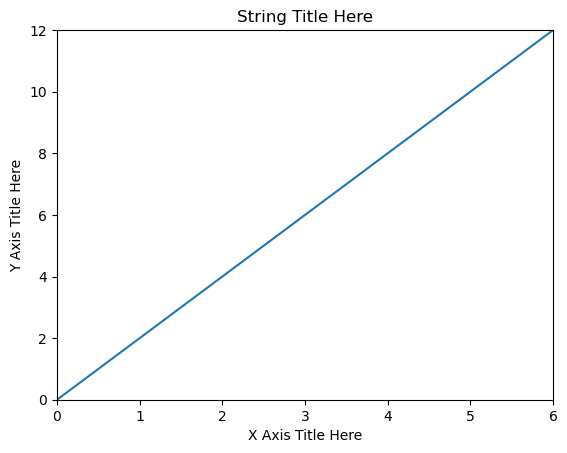

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,10)
y = 2*x
plt.plot(x, y) 

plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')

plt.xlim(0,6) # Lower Limit, Upper Limit  der Achse
plt.ylim(0,12) # Lower Limit, Upper Limit der Achse

plt.savefig('exampleMatplotlib.png')
# bbox_inches ='tight' automatically makes sure the bounding box is correct
# fig.savefig('figure.png',bbox_inches='tight')

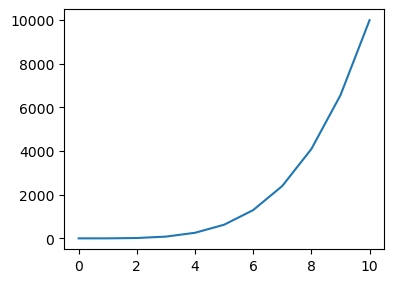

In [ ]:
# Figuren

# Create Figure (empty canvas)
fig = plt.figure()
# Add set of axes to figure
axes = fig.add_axes([0, 0, 0.5, 0.5]) # left, bottom, width, height (range 0 to 1)
a = np.linspace(0,10,11)
b = a ** 4
# Plot on that set of axes
axes.plot(a, b)

plt.show()

Text(0.5, 1.0, 'Zoomed In')

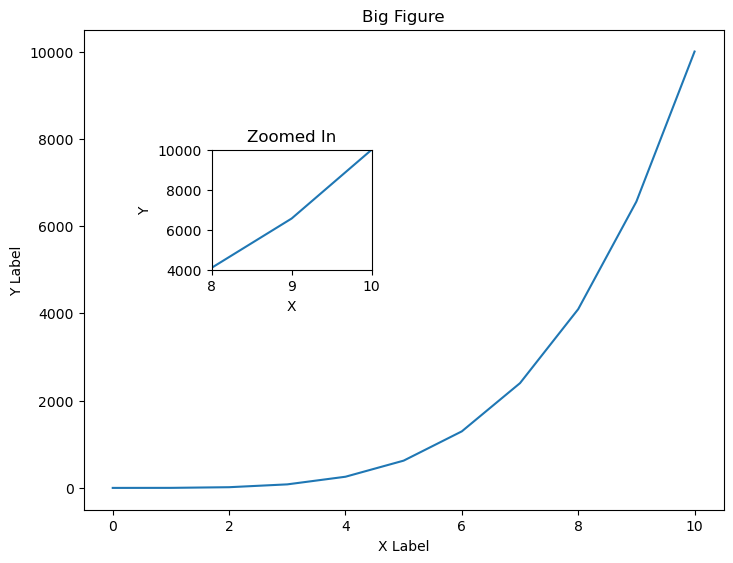

In [ ]:
# Figur in Figur
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0, 0, 1, 1]) # Large figure
axes2 = fig.add_axes([0.2, 0.5, 0.25, 0.25]) # Smaller figure

# Larger Figure Axes 1
axes1.plot(a, b)

# Use set_ to add to the axes figure
axes1.set_xlabel('X Label')
axes1.set_ylabel('Y Label')
axes1.set_title('Big Figure')

# Insert Figure Axes 2
axes2.plot(a,b)
axes2.set_xlim(8,10)
axes2.set_ylim(4000,10000)
axes2.set_xlabel('X')
axes2.set_ylabel('Y')
axes2.set_title('Zoomed In')

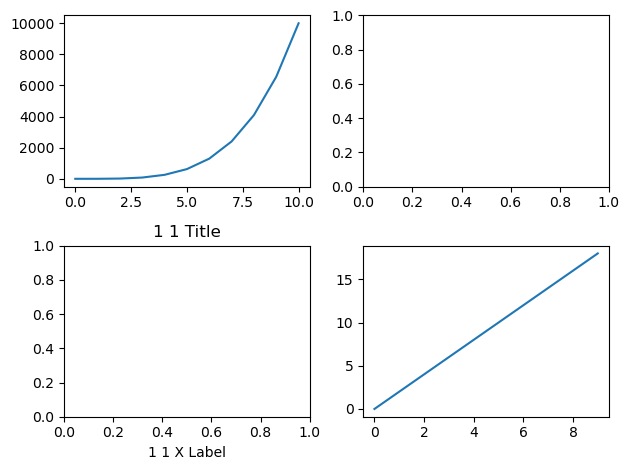

In [ ]:
# Empty canvas of 2 by 2 subplots
fig,axes = plt.subplots(nrows=2,ncols=2)

axes[0][0].plot(a,b)
axes[1][1].plot(x,y)  

axes[1][0].set_title('1 1 Title')
axes[1][0].set_xlabel('1 1 X Label')

plt.tight_layout()

## neue Libary

# 1